### Start Date: 1/11/2023

### Goal: Get back on track with projects and get better at Python DS

#### Credit for problems and data set belongs to Keith Galli YouTube. Video found here: https://www.youtube.com/watch?v=eMOA1pPVUc4

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

### Merge 12 months of sales data into one single file

In [2]:
pd.read_csv("./SalesAnalysis/Sales_Data/Sales_April_2019.csv").head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [3]:
files = [file for file in os.listdir("./SalesAnalysis/Sales_data")]

In [4]:
files

['Sales_April_2019.csv',
 'Sales_August_2019.csv',
 'Sales_December_2019.csv',
 'Sales_February_2019.csv',
 'Sales_January_2019.csv',
 'Sales_July_2019.csv',
 'Sales_June_2019.csv',
 'Sales_March_2019.csv',
 'Sales_May_2019.csv',
 'Sales_November_2019.csv',
 'Sales_October_2019.csv',
 'Sales_September_2019.csv']

In [5]:
all_months_data = pd.DataFrame()

for file in files:
    all_months_data = pd.concat([all_months_data, pd.read_csv("./SalesAnalysis/Sales_data/" + file)])

In [6]:
all_months_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


### Read in all data

In [7]:
all_months_data.to_csv("all_data.csv", index = False)

In [8]:
all_data = pd.read_csv("all_data.csv")

In [9]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### Clean Data: Drop NAs

In [10]:
all_data.isna().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [11]:
all_data.columns.values

array(['Order ID', 'Product', 'Quantity Ordered', 'Price Each',
       'Order Date', 'Purchase Address'], dtype=object)

It seems as though when there is an NA or NaN, the whole row is an NA value. We should simply delete all of these rows. Let's check

In [12]:
all_data[all_data.isna()]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
186845,NaN,NaN,NaN,NaN,NaN,NaN
186846,NaN,NaN,NaN,NaN,NaN,NaN
186847,NaN,NaN,NaN,NaN,NaN,NaN
186848,NaN,NaN,NaN,NaN,NaN,NaN


Yep! It is true. Let's drop them.

In [13]:
all_data = all_data.dropna()
all_data.isna().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [14]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


### Clean Data: Drop invalid values in Order Date Column

There exist values that have "Order Date" in the "Order Date" column.

In [15]:
all_data[all_data["Order Date"].str[0:2] == "Or"]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
185164,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
185551,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186563,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186632,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


Let's delete all of this

In [16]:
all_data = all_data[all_data["Order Date"].str[0:2] != "Or"]

### Clean Data: Correct data into correct types

In [17]:
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

Some data is incorrect. For example, Quantity Ordered and Price Each should be numeric. We should also make the Order Date into a datetime object

In [18]:
all_data["Quantity Ordered"] = pd.to_numeric(all_data["Quantity Ordered"])

In [19]:
all_data["Price Each"] = pd.to_numeric(all_data["Price Each"])

In [20]:
all_data["Order Date"] = pd.to_datetime(all_data["Order Date"])

In [21]:
all_data.dtypes

Order ID                    object
Product                     object
Quantity Ordered             int64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
dtype: object

### Augment data for easier work

#### Add month column (from video)

In [22]:
# all_data["Month"] = all_data["Order Date"].str[0:2]
# all_data["Month"] = pd.to_numeric(all_data["Month"])
# all_data["Month"]

#### Add Month column when we use datetime object

In [23]:
all_data["Month"] = pd.DatetimeIndex(all_data["Order Date"]).month

In [24]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4


#### Add a sales column

In [25]:
all_data["Sales"] = all_data["Quantity Ordered"] * all_data["Price Each"]

In [26]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99


#### Add a city column using the apply function

Notice how the city is separated by columns. We can use the .split function to split the string

In [27]:
all_data["Purchase Address"][0].split(",")

['917 1st St', ' Dallas', ' TX 75001']

In [28]:
# we can access the city by indexing
all_data["Purchase Address"][0].split(",")[1]

' Dallas'

Note the white space. Let's take that out using the .strip() method

In [29]:
all_data["Purchase Address"][0].split(",")[1].strip()

'Dallas'

Let's define a function to take the city

In [30]:
def get_city(address):
    return address.split(",")[1].strip()

We can use a for loop (as commented out below).

In [31]:
# for address in all_data["Purchase Address"]:
#     print(address.split(",")[1])

But perhaps a faster way would be to use the apply function

In [32]:
all_data["Purchase Address"].apply(lambda x: get_city(x))

0                Dallas
2                Boston
3           Los Angeles
4           Los Angeles
5           Los Angeles
              ...      
186845      Los Angeles
186846    San Francisco
186847    San Francisco
186848    San Francisco
186849    San Francisco
Name: Purchase Address, Length: 185950, dtype: object

In [33]:
all_data["City"] = all_data["Purchase Address"].apply(lambda x: get_city(x))

In [34]:
all_data["City"]

0                Dallas
2                Boston
3           Los Angeles
4           Los Angeles
5           Los Angeles
              ...      
186845      Los Angeles
186846    San Francisco
186847    San Francisco
186848    San Francisco
186849    San Francisco
Name: City, Length: 185950, dtype: object

Note we also need the state.

In [35]:
all_data["Purchase Address"][0].split(",")[2][0:3]

' TX'

In [36]:
def get_state(address):
    return address.split(",")[2][0:3]

In [37]:
all_data["Purchase Address"].apply(lambda x: f"{get_city(x)},{get_state(x)}")

0                Dallas, TX
2                Boston, MA
3           Los Angeles, CA
4           Los Angeles, CA
5           Los Angeles, CA
                ...        
186845      Los Angeles, CA
186846    San Francisco, CA
186847    San Francisco, CA
186848    San Francisco, CA
186849    San Francisco, CA
Name: Purchase Address, Length: 185950, dtype: object

In [38]:
all_data["City"] = all_data["Purchase Address"].apply(lambda x: f"{get_city(x)},{get_state(x)}")

In [39]:
all_data["City"]

0                Dallas, TX
2                Boston, MA
3           Los Angeles, CA
4           Los Angeles, CA
5           Los Angeles, CA
                ...        
186845      Los Angeles, CA
186846    San Francisco, CA
186847    San Francisco, CA
186848    San Francisco, CA
186849    San Francisco, CA
Name: City, Length: 185950, dtype: object

### Determine the best month for sales and how much was earned

In [40]:
all_data.groupby("Month").sum()

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1.811768e+06,1.822257e+06
2,13449,2.188885e+06,2.202022e+06
3,17005,2.791208e+06,2.807100e+06
4,20558,3.367671e+06,3.390670e+06
5,18667,3.135125e+06,3.152607e+06
6,15253,2.562026e+06,2.577802e+06
7,16072,2.632540e+06,2.647776e+06
8,13448,2.230345e+06,2.244468e+06
9,13109,2.084992e+06,2.097560e+06


In [41]:
all_data.groupby("Month").sum().sort_values("Sales", ascending = False)

,Quantity Ordered,Price Each,Sales
Month,,,
12,28114,4.588415e+06,4.613443e+06
10,22703,3.715555e+06,3.736727e+06
4,20558,3.367671e+06,3.390670e+06
11,19798,3.180601e+06,3.199603e+06
5,18667,3.135125e+06,3.152607e+06
3,17005,2.791208e+06,2.807100e+06
7,16072,2.632540e+06,2.647776e+06
6,15253,2.562026e+06,2.577802e+06
8,13448,2.230345e+06,2.244468e+06


The best month for sales was December. That makes sense, since it is around Christmas time!

In [42]:
months_sales_results = all_data.groupby("Month").sum().Sales

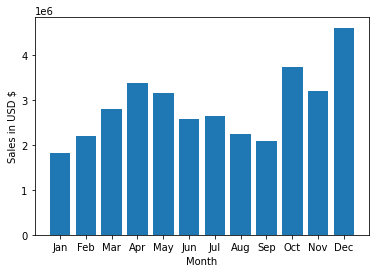

In [43]:
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
          "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
plt.bar(months, months_sales_results)
plt.xticks(months)
plt.ylabel("Sales in USD $")
plt.xlabel("Month")
plt.show()

### Determine which city had the highest number of sales

In [44]:
all_data.groupby("City").sum()

,Quantity Ordered,Price Each,Month,Sales
City,,,,
"Atlanta, GA",16602,2.779908e+06,104794,2.795499e+06
"Austin, TX",11153,1.809874e+06,69829,1.819582e+06
"Boston, MA",22528,3.637410e+06,141112,3.661642e+06
"Dallas, TX",16730,2.752628e+06,104620,2.767975e+06
"Los Angeles, CA",33289,5.421435e+06,208325,5.452571e+06
"New York City, NY",27932,4.635371e+06,175741,4.664317e+06
"Portland, ME",2750,4.471893e+05,17144,4.497583e+05
"Portland, OR",11303,1.860558e+06,70621,1.870732e+06
"San Francisco, CA",50239,8.211462e+06,315520,8.262204e+06


In [45]:
all_data.groupby("City").sum().sort_values("Sales", ascending = False)

,Quantity Ordered,Price Each,Month,Sales
City,,,,
"San Francisco, CA",50239,8.211462e+06,315520,8.262204e+06
"Los Angeles, CA",33289,5.421435e+06,208325,5.452571e+06
"New York City, NY",27932,4.635371e+06,175741,4.664317e+06
"Boston, MA",22528,3.637410e+06,141112,3.661642e+06
"Atlanta, GA",16602,2.779908e+06,104794,2.795499e+06
"Dallas, TX",16730,2.752628e+06,104620,2.767975e+06
"Seattle, WA",16553,2.733296e+06,104941,2.747755e+06
"Portland, OR",11303,1.860558e+06,70621,1.870732e+06
"Austin, TX",11153,1.809874e+06,69829,1.819582e+06


San Francisco has the highest sales

In [46]:
city_sales_results = all_data.groupby("City").sum().Sales

In [47]:
[city for city, df in all_data.groupby("City")]

['Atlanta, GA',
 'Austin, TX',
 'Boston, MA',
 'Dallas, TX',
 'Los Angeles, CA',
 'New York City, NY',
 'Portland, ME',
 'Portland, OR',
 'San Francisco, CA',
 'Seattle, WA']

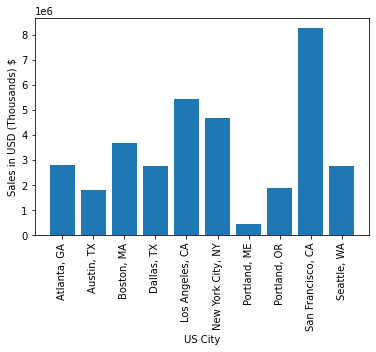

In [48]:
cities = [city for city, df in all_data.groupby("City")]
plt.bar(cities, city_sales_results)
plt.xticks(cities, rotation = "vertical")
plt.ylabel("Sales in USD (Thousands) $")
plt.xlabel("US City")
plt.show()

### Determine what time we should display advertisements to maximize likelihood of customers buying a product

First we need to find the hour of each datetime object. Two ways we can do that:

In [54]:
# same way we did from earlier
pd.DatetimeIndex(all_data["Order Date"]).hour

Int64Index([ 8, 22, 14, 14,  9, 13,  7, 10, 10, 14,
            ...
            22, 13, 13, 19, 15, 20, 16,  7, 17,  0],
           dtype='int64', name='Order Date', length=185950)

In [53]:
# from video
all_data["Order Date"].dt.hour

0          8
2         22
3         14
4         14
5          9
          ..
186845    20
186846    16
186847     7
186848    17
186849     0
Name: Order Date, Length: 185950, dtype: int64

Think: what is the difference between what the two returned?

In [59]:
all_data["Hour"] = all_data["Order Date"].dt.hour
all_data["Minute"] = all_data["Order Date"].dt.minute

In [61]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,"Dallas, TX",8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,"Boston, MA",22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,"Los Angeles, CA",14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,"Los Angeles, CA",14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,"Los Angeles, CA",9,27


In [63]:
all_data.groupby(["Hour"]).count()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Minute
Hour,,,,,,,,,,
0,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910
1,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350
2,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243
3,831,831,831,831,831,831,831,831,831,831
4,854,854,854,854,854,854,854,854,854,854
5,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321
6,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482
7,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011
8,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256


Above shows the amount of rows exist for each hour. For example, there exist 3910 rows (so orders) in the 0th hour.

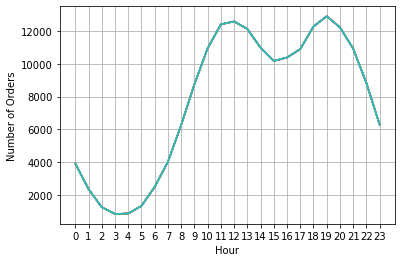

In [68]:
hours = [hour for hour, df in all_data.groupby("Hour")]

plt.plot(hours, all_data.groupby(["Hour"]).count())
plt.xticks(hours)
plt.xlabel("Hour")
plt.ylabel("Number of Orders")
plt.grid()
plt.show()

We see peaks at around the 11th hour (11AM) and 19th hour (7PM). Thus, we should display advertisements a bit before 11AM and 7PM.

### What products are most often sold together?

First off, what kinds of products are there?

In [73]:
all_data["Product"].unique()

array(['USB-C Charging Cable', 'Bose SoundSport Headphones',
       'Google Phone', 'Wired Headphones', 'Macbook Pro Laptop',
       'Lightning Charging Cable', '27in 4K Gaming Monitor',
       'AA Batteries (4-pack)', 'Apple Airpods Headphones',
       'AAA Batteries (4-pack)', 'iPhone', 'Flatscreen TV',
       '27in FHD Monitor', '20in Monitor', 'LG Dryer', 'ThinkPad Laptop',
       'Vareebadd Phone', 'LG Washing Machine', '34in Ultrawide Monitor'],
      dtype=object)

Just because I'm curious, which product sold the most?

In [80]:
all_data.groupby(["Product"]).sum().sort_values("Quantity Ordered")

,Quantity Ordered,Price Each,Month,Sales,Hour,Minute
Product,,,,,,
LG Dryer,646,387600.00,4383,387600.00,9326,19043
LG Washing Machine,666,399600.00,4523,399600.00,9785,19462
Vareebadd Phone,2068,826000.00,14309,827200.00,29472,61835
20in Monitor,4129,451068.99,29336,454148.71,58764,122252
ThinkPad Laptop,4130,4127958.72,28950,4129958.70,59746,121508
Macbook Pro Laptop,4728,8030800.00,33548,8037600.00,68261,137574
Flatscreen TV,4819,1440000.00,34224,1445700.00,68815,142789
Google Phone,5532,3315000.00,38305,3319200.00,79479,162773
34in Ultrawide Monitor,6199,2348718.19,43304,2355558.01,89076,183480


The .duplicated() function helps us find the order IDs that are the same. We can use it to find a person's order

In [84]:
all_data["Order ID"].duplicated(keep = False)

0         False
2         False
3          True
4          True
5         False
          ...  
186845    False
186846    False
186847    False
186848    False
186849    False
Name: Order ID, Length: 185950, dtype: bool

In [117]:
multiple_item_orders = all_data[all_data["Order ID"].duplicated(keep = False)]
multiple_item_orders.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,"Los Angeles, CA",14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,"Los Angeles, CA",14,38
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,"Los Angeles, CA",19,42
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,"Los Angeles, CA",19,42
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,"Boston, MA",11,31
31,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,"Boston, MA",11,31
32,176586,AAA Batteries (4-pack),2,2.99,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",4,5.98,"San Francisco, CA",17,0
33,176586,Google Phone,1,600.00,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",4,600.00,"San Francisco, CA",17,0
119,176672,Lightning Charging Cable,1,14.95,2019-04-12 11:07:00,"778 Maple St, New York City, NY 10001",4,14.95,"New York City, NY",11,7
120,176672,USB-C Charging Cable,1,11.95,2019-04-12 11:07:00,"778 Maple St, New York City, NY 10001",4,11.95,"New York City, NY",11,7


With this, we have found orders that have more than one item in its order. This is helpful in finding which products are sold the most together, since it has filtered out the orders that have only have one item. We now want to group the products and Order ID together

In [118]:
multiple_item_orders["Ordered Products"] = multiple_item_orders.groupby(["Order ID"])["Product"].transform(lambda x: ", ".join(x))

<ipython-input-118-c6d474e534b6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  multiple_item_orders["Ordered Products"] = multiple_item_orders.groupby(["Order ID"])["Product"].transform(lambda x: ", ".join(x))


In [119]:
multiple_item_orders.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Ordered Products
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,"Los Angeles, CA",14,38,"Google Phone, Wired Headphones"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,"Los Angeles, CA",14,38,"Google Phone, Wired Headphones"
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,"Los Angeles, CA",19,42,"Google Phone, USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,"Los Angeles, CA",19,42,"Google Phone, USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,"Boston, MA",11,31,"Bose SoundSport Headphones, Bose SoundSport He..."
31,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,"Boston, MA",11,31,"Bose SoundSport Headphones, Bose SoundSport He..."
32,176586,AAA Batteries (4-pack),2,2.99,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",4,5.98,"San Francisco, CA",17,0,"AAA Batteries (4-pack), Google Phone"
33,176586,Google Phone,1,600.00,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",4,600.00,"San Francisco, CA",17,0,"AAA Batteries (4-pack), Google Phone"
119,176672,Lightning Charging Cable,1,14.95,2019-04-12 11:07:00,"778 Maple St, New York City, NY 10001",4,14.95,"New York City, NY",11,7,"Lightning Charging Cable, USB-C Charging Cable"
120,176672,USB-C Charging Cable,1,11.95,2019-04-12 11:07:00,"778 Maple St, New York City, NY 10001",4,11.95,"New York City, NY",11,7,"Lightning Charging Cable, USB-C Charging Cable"


Notice how we have duplicates of Order ID and the Ordered Products. We don't want that, since we only need the orders once.

In [120]:
multiple_item_orders = multiple_item_orders[["Order ID", "Ordered Products"]].drop_duplicates()
multiple_item_orders.head(20)

,Order ID,Ordered Products
3,176560,"Google Phone, Wired Headphones"
18,176574,"Google Phone, USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones, Bose SoundSport He..."
32,176586,"AAA Batteries (4-pack), Google Phone"
119,176672,"Lightning Charging Cable, USB-C Charging Cable"
129,176681,"Apple Airpods Headphones, ThinkPad Laptop"
138,176689,"Bose SoundSport Headphones, AAA Batteries (4-p..."
189,176739,"34in Ultrawide Monitor, Google Phone"
225,176774,"Lightning Charging Cable, USB-C Charging Cable"
233,176781,"iPhone, Lightning Charging Cable"


In [121]:
from itertools import combinations
from collections import Counter

In [127]:
count = Counter()
for row in multiple_item_orders["Ordered Products"]:
    row_list = row.split(", ")
    count.update(Counter(combinations(row_list, 2)))
        
for key, value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


These are the top 10 pairs of products that are most sold together, with an iPhone and a lightning charging cable being at number 1

### What product sold the most?

In [131]:
all_data.groupby("Product").sum().sort_values("Quantity Ordered")

,Quantity Ordered,Price Each,Month,Sales,Hour,Minute
Product,,,,,,
LG Dryer,646,387600.00,4383,387600.00,9326,19043
LG Washing Machine,666,399600.00,4523,399600.00,9785,19462
Vareebadd Phone,2068,826000.00,14309,827200.00,29472,61835
20in Monitor,4129,451068.99,29336,454148.71,58764,122252
ThinkPad Laptop,4130,4127958.72,28950,4129958.70,59746,121508
Macbook Pro Laptop,4728,8030800.00,33548,8037600.00,68261,137574
Flatscreen TV,4819,1440000.00,34224,1445700.00,68815,142789
Google Phone,5532,3315000.00,38305,3319200.00,79479,162773
34in Ultrawide Monitor,6199,2348718.19,43304,2355558.01,89076,183480


In [136]:
products = [products for products, df in all_data.groupby("Product")]
products

['20in Monitor',
 '27in 4K Gaming Monitor',
 '27in FHD Monitor',
 '34in Ultrawide Monitor',
 'AA Batteries (4-pack)',
 'AAA Batteries (4-pack)',
 'Apple Airpods Headphones',
 'Bose SoundSport Headphones',
 'Flatscreen TV',
 'Google Phone',
 'LG Dryer',
 'LG Washing Machine',
 'Lightning Charging Cable',
 'Macbook Pro Laptop',
 'ThinkPad Laptop',
 'USB-C Charging Cable',
 'Vareebadd Phone',
 'Wired Headphones',
 'iPhone']

In [146]:
quantity_ordered = all_data.groupby("Product").sum()["Quantity Ordered"]
quantity_ordered

Product
20in Monitor                   4129
27in 4K Gaming Monitor         6244
27in FHD Monitor               7550
34in Ultrawide Monitor         6199
AA Batteries (4-pack)         27635
AAA Batteries (4-pack)        31017
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
Flatscreen TV                  4819
Google Phone                   5532
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      23217
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
USB-C Charging Cable          23975
Vareebadd Phone                2068
Wired Headphones              20557
iPhone                         6849
Name: Quantity Ordered, dtype: int64

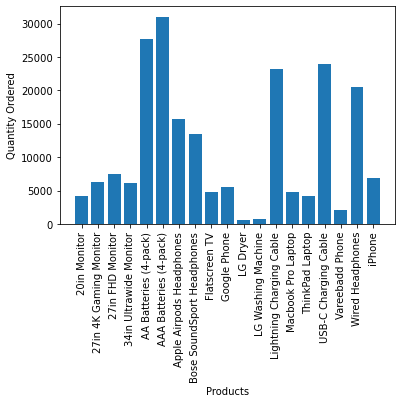

In [147]:
plt.bar(products, quantity_ordered)
plt.xticks(products, rotation = "vertical")
plt.xlabel("Products")
plt.ylabel("Quantity Ordered")
plt.show()

### Is there some sort of correlation between prices and the quantity ordered?

In [149]:
mean_prices = all_data.groupby("Product").mean()["Price Each"]
mean_prices

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

<ipython-input-165-7131eacfd300>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation = "vertical")


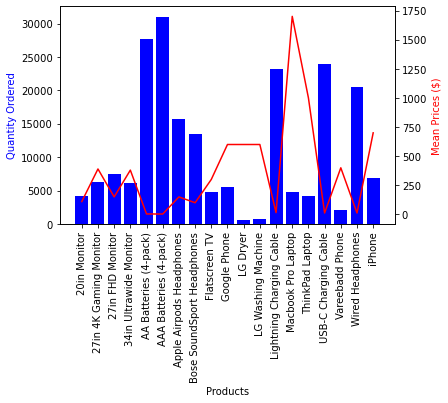

In [165]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color = "b")
ax2.plot(products, mean_prices, "-r")


ax1.set_xlabel("Products")
ax1.set_ylabel("Quantity Ordered", color = "b")
ax2.set_ylabel("Mean Prices ($)", color = "r")

ax1.set_xticklabels(products, rotation = "vertical")

plt.show()